In [1]:
pip install autogen-agentchat~=0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.3/382.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
api_key=userdata.get('open_ai')

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image
import json
import autogen
configs = [
    {'model': 'gpt-3.5-turbo','api_key': api_key},
    {'model': 'gpt-4','api_key': api_key},
    {'model': 'gpt-3.5-turbo', 'api_key': api_key},
    {'model': 'gpt-3.5-turbo', 'api_key': api_key},
]
with open("OAI_CONFIG_LIST", "w") as f:
    json.dump(configs, f)
config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
    },
)

In [8]:
llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""Critic. You are a helpful assistant highly skilled in evaluating the quality of a given visualization code by providing a score from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER VISUALIZATION BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
- bugs (bugs):  are there bugs, logic errors, syntax error or typos? Are there any reasons why the code may fail to compile? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
- Data transformation (transformation): Is the data transformed appropriately for the visualization type? E.g., is the dataset appropriated filtered, aggregated, or grouped  if needed? If a date field is used, is the date field first converted to a date object etc?
- Goal compliance (compliance): how well the code meets the specified visualization goals?
- Visualization type (type): CONSIDERING BEST PRACTICES, is the visualization type appropriate for the data and intent? Is there a visualization type that would be more effective in conveying insights? If a different visualization type is more appropriate, the score MUST BE LESS THAN 5.
- Data encoding (encoding): Is the data encoded appropriately for the visualization type?
- aesthetics (aesthetics): Are the aesthetics of the visualization appropriate for the visualization type and the data?

YOU MUST PROVIDE A SCORE for each of the above dimensions.
{bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
Do not suggest code.
Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
""",
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [9]:
user_proxy.initiate_chat(
    manager,
    message="download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.",
)

User_proxy (to chat_manager):

download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

Sure, we'll need to do the following steps:

1. Download the `cars.csv` file from the provided URL.
2. Load the CSV file using pandas, and print the fields of the dataset.
3. Plot the relationship between the `weight` and `horsepower` columns using Matplotlib.
4. Save the plot to a file.

Here is the Python code to accomplish these. This code, when executed, will download the data, handle csv loading and plotting all at once.

```python
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

# Download the 

ChatResult(chat_id=None, chat_history=[{'content': 'download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.', 'role': 'assistant', 'name': 'User_proxy'}, {'content': 'Sure, we\'ll need to do the following steps:\n\n1. Download the `cars.csv` file from the provided URL.\n2. Load the CSV file using pandas, and print the fields of the dataset.\n3. Plot the relationship between the `weight` and `horsepower` columns using Matplotlib.\n4. Save the plot to a file.\n\nHere is the Python code to accomplish these. This code, when executed, will download the data, handle csv loading and plotting all at once.\n\n```python\n# Import the required libraries\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport requests\nfrom io import StringIO\n\n# Download the CSV data\nurl = "https://raw.gith

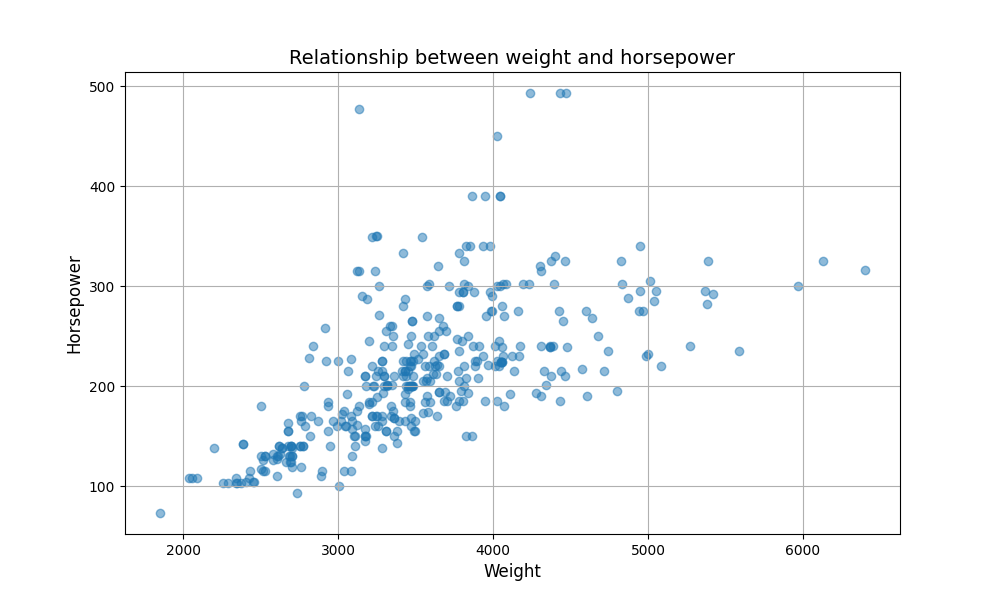

In [11]:
Image(filename="/content/groupchat/weight_horsepower.png")